In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Now we move on to analyse the blitz dataset for highly ranked players.

In [2]:
chessdata = pd.read_csv('bulletHighingData.csv')
chessdata['Opening_new'].describe()


count                11363
unique                  90
top       Sicilian Defense
freq                  1400
Name: Opening_new, dtype: object

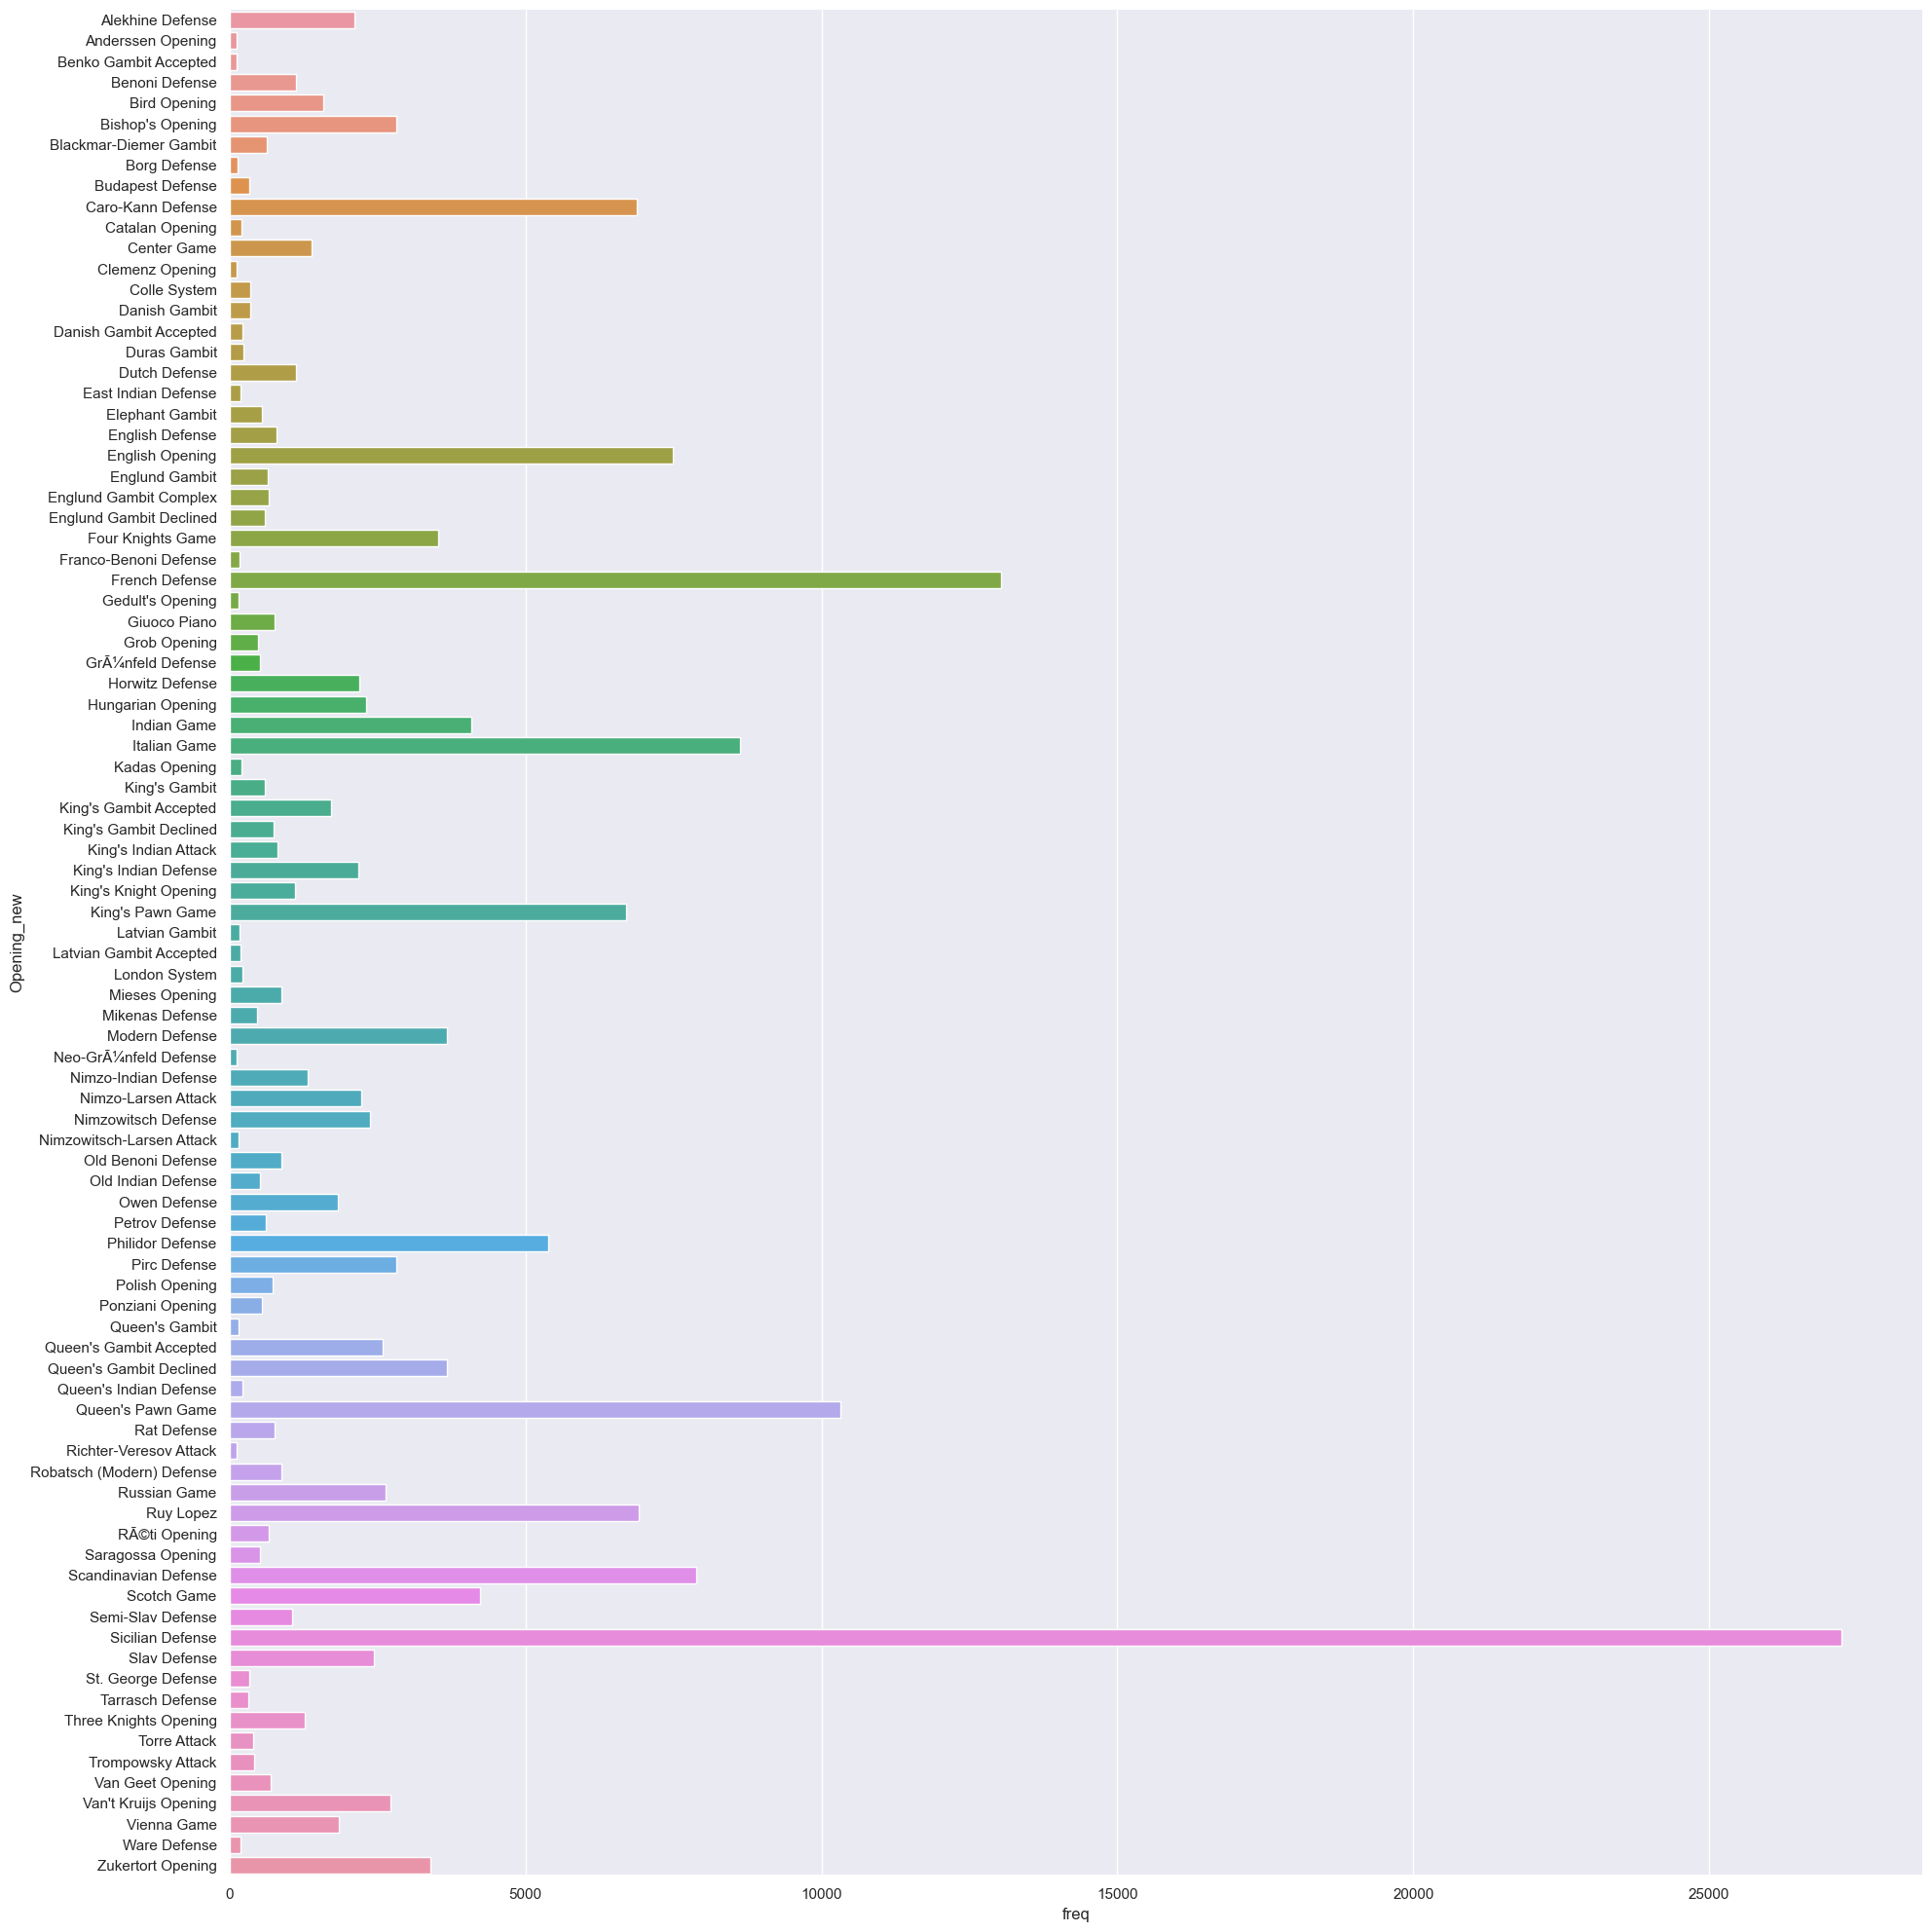

In [3]:
myorder=sorted(chessdata['Opening_new'].drop_duplicates())

sb.catplot(x= 'freq', y='Opening_new', data = chessdata, kind='bar',orient='h', height=20, aspect=1, order=myorder, errorbar=None)


In [4]:
freq_gen = chessdata
freq_gen['tot'] = freq_gen.groupby('Opening_new')['Opening_new'].transform('count')


# freq_gen['Opening_new'] = freq_gen['Opening_new'].drop_duplicates()
# freq_gen = freq_gen.dropna()
# frgeeq_n



In [5]:
temp = freq_gen[['Opening_new', 'Result', 'tot']]

#convert the fucking strings to integers
temp.loc[temp.Result == "0-1", 'Result'] = 0
temp.loc[temp.Result == "1-0", 'Result'] = 1
temp.loc[temp.Result == "1/2-1/2", 'Result'] = 0


temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')

temp['Opening_new'] = temp['Opening_new'].drop_duplicates()
temp = temp.dropna()

temp = temp.drop('Result', axis=1)
temp["win_rate"] = temp["win"].div(temp["tot"].values)

temp.sort_values(by=['win_rate'])


C:\Users\rinoa\AppData\Local\Temp\ipykernel_12256\2706443046.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')
C:\Users\rinoa\AppData\Local\Temp\ipykernel_12256\2706443046.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Opening_new'] = temp['Opening_new'].drop_duplicates()


,Opening_new,tot,win,win_rate
325,Petrov Defense,10,2,0.2
483,Gedult's Opening,15,4,0.266667
623,Queen's Indian Defense,27,8,0.296296
405,London System,16,5,0.3125
5381,Giuoco Piano,6,2,0.333333
...,...,...,...,...
1560,Queen's Gambit,9,6,0.666667
313,Bishop's Opening,66,44,0.666667
1025,Duras Gambit,22,15,0.681818
708,Borg Defense,13,9,0.692308


Win rate for white

In [6]:
temp = temp[temp['tot'] >100]
temp.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
75,Mieses Opening,135,54,0.4
8,Italian Game,157,66,0.420382
252,Semi-Slav Defense,101,45,0.445545
70,Van't Kruijs Opening,235,105,0.446809
128,Vienna Game,104,49,0.471154
34,Nimzo-Larsen Attack,321,153,0.476636
64,Old Benoni Defense,144,69,0.479167
41,Queen's Pawn Game,654,318,0.486239
4,French Defense,777,381,0.490347
10,Scandinavian Defense,506,249,0.492095


Immediately we see, white performs very well in the Philidor Defense, Vienna Game, Zukertort Opening, Modern Defense and Semi-Slav Defense. The former, we mentioned in the BlitzMid dataset. We will take a closer look at these in the classification tree.

In [7]:
temp1 = freq_gen[['Opening_new', 'Result', 'tot']]

#convert the fucking strings to integers
temp1.loc[temp1.Result == "0-1", 'Result'] = 1
temp1.loc[temp1.Result == "1-0", 'Result'] = 0
temp1.loc[temp1.Result == "1/2-1/2", 'Result'] = 0


temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')

temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()
temp1 = temp1.dropna()

temp1 = temp1.drop('Result', axis=1)
temp1["win_rate"] = temp1["win"].div(temp1["tot"].values)

temp1.sort_values(by=['win_rate'])

C:\Users\rinoa\AppData\Local\Temp\ipykernel_12256\3596201361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')
C:\Users\rinoa\AppData\Local\Temp\ipykernel_12256\3596201361.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()


,Opening_new,tot,win,win_rate
1025,Duras Gambit,22,6,0.272727
196,Englund Gambit,56,16,0.285714
708,Borg Defense,13,4,0.307692
313,Bishop's Opening,66,21,0.318182
180,Englund Gambit Complex,40,13,0.325
...,...,...,...,...
5381,Giuoco Piano,6,4,0.666667
473,Richter-Veresov Attack,6,4,0.666667
623,Queen's Indian Defense,27,18,0.666667
325,Petrov Defense,10,7,0.7


Winrate for Black

In [8]:

temp1 = temp1[temp1['tot'] >100]
temp1.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
9,Horwitz Defense,165,63,0.381818
181,Scotch Game,126,50,0.396825
74,Slav Defense,168,68,0.404762
38,Bird Opening,142,58,0.408451
164,Philidor Defense,114,48,0.421053
42,Queen's Gambit Declined,324,140,0.432099
81,King's Indian Attack,113,49,0.433628
56,Nimzowitsch Defense,122,53,0.434426
18,Pirc Defense,272,119,0.4375
15,Owen Defense,130,57,0.438462


Black does extremely well in the Van't Kruijs Opening, more than 5% points higher than the next best. We explained why in BlitzMid, and it is no suprise to see that a suboptimal first move suffers in the more competitive format.

In [9]:
# Import the encoder from sklearn
chessdata.loc[chessdata.Result == "0-1", 'Result'] = "-1" #black win
chessdata.loc[chessdata.Result == "1-0", 'Result'] = "1" #white win
chessdata.loc[chessdata.Result == "1/2-1/2", 'Result'] = "0" #draw
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_predictors = chessdata[["Opening_new"]]

In [10]:
ohe.fit(cat_predictors)
predictors_cat_ohe = pd.DataFrame(ohe.transform(cat_predictors).toarray(), 
                                  columns=ohe.get_feature_names_out(cat_predictors.columns))

In [11]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [12]:
chessdata.info()
chessData_num = chessdata[['ELO Diff']]
chessData_res = chessdata['Result']
chessData_ohe = pd.concat([chessData_num, predictors_cat_ohe, chessData_res], 
                           sort = False, axis = 1).reindex(index=chessData_num.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363 entries, 0 to 11362
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    11363 non-null  int64  
 1   BlackElo      11363 non-null  int64  
 2   ECO           11363 non-null  object 
 3   Event         11363 non-null  object 
 4   Opening       11363 non-null  object 
 5   Result        11363 non-null  object 
 6   Termination   11363 non-null  object 
 7   TimeControl   11363 non-null  object 
 8   WhiteElo      11363 non-null  int64  
 9   BlackTitle    335 non-null    object 
 10  WhiteTitle    335 non-null    object 
 11  Move_ply_200  18 non-null     object 
 12  Category      11363 non-null  object 
 13  Opening_new   11363 non-null  object 
 14  freq          11363 non-null  int64  
 15  ELO Diff      11363 non-null  int64  
 16  Ave ELO       11363 non-null  float64
 17  tot           11363 non-null  int64  
dtypes: float64(1), int64(6), o

In [13]:


# Extract Response and Predictors
y = pd.DataFrame(chessData_ohe['Result'])
X = pd.DataFrame(chessData_ohe.drop('Result', axis = 1))


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6) 
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree


DecisionTreeClassifier(max_depth=6)

In [14]:
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

Train Data
Accuracy  :	 0.5951722403821976

Test Data
Accuracy  :	 0.5860956292167792



[Text(0.555640243902439, 0.9285714285714286, 'ELO Diff <= 46.5\ngini = 0.517\nsamples = 7954\nvalue = [3767, 143, 4044]\nclass = White'),
 Text(0.2652439024390244, 0.7857142857142857, 'ELO Diff <= -194.5\ngini = 0.513\nsamples = 5534\nvalue = [2970, 98, 2466]\nclass = Black'),
 Text(0.11585365853658537, 0.6428571428571429, 'ELO Diff <= -344.5\ngini = 0.405\nsamples = 692\nvalue = [505, 15, 172]\nclass = Black'),
 Text(0.06097560975609756, 0.5, 'Opening_new_Saragossa Opening <= 0.5\ngini = 0.308\nsamples = 255\nvalue = [207, 2, 46]\nclass = Black'),
 Text(0.036585365853658534, 0.35714285714285715, 'Opening_new_Italian Game <= 0.5\ngini = 0.294\nsamples = 249\nvalue = [205, 2, 42]\nclass = Black'),
 Text(0.024390243902439025, 0.21428571428571427, "Opening_new_King's Knight Opening <= 0.5\ngini = 0.289\nsamples = 248\nvalue = [205, 2, 41]\nclass = Black"),
 Text(0.012195121951219513, 0.07142857142857142, 'gini = 0.285\nsamples = 247\nvalue = [205, 2, 40]\nclass = Black'),
 Text(0.03658536

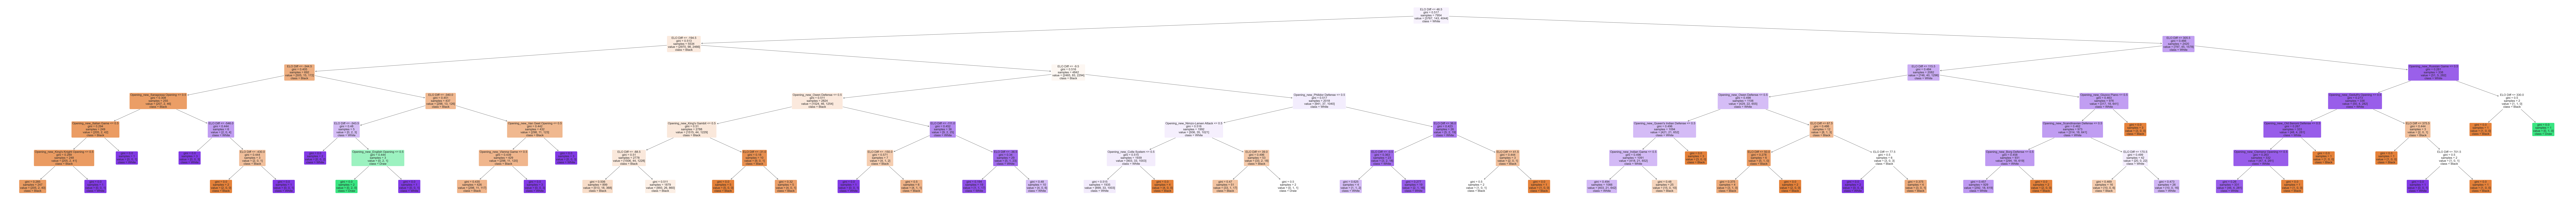

In [15]:
f = plt.figure(figsize=(256,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Black","Draw","White"])

![The Philidor Defence](highphoto/left.png "Title")

![The Philidor Defence](highphoto/mid.png "Title")

![The Philidor Defence](highphoto/right.png "Title")